In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv, null_space

# Importing the necessary modules

# Setting the plot style
plt.rcParams["text.usetex"] = True
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# Increase the font size for labels
plt.rcParams.update({"font.size": 18})
# keep the font size for ticks the same
plt.rcParams.update({"xtick.labelsize": 10})
plt.rcParams.update({"ytick.labelsize": 10})
# keep the font size for legend the same
plt.rcParams.update({"legend.fontsize": 10})


# Initialization
B = np.array([1, 2]).reshape(1, -1)
tau_cmd = -6
a0 = np.array([1, -1])
a0 = a0 / np.linalg.norm(a0)

w = 1.0
lambda_val = 0.90

B_pinv = pinv(B)
Q = null_space(B)

# Computations
xi1 = B_pinv.dot(tau_cmd)

cos_Q_a0 = Q.T.dot(a0)
th_opt_2 = np.sign(cos_Q_a0) * np.sqrt(lambda_val**2 * cos_Q_a0**2 * xi1.T.dot(xi1) / (1 - lambda_val**2 * cos_Q_a0**2))
xi2 = xi1 + Q * th_opt_2

J2_xi1 = w * (np.sqrt(xi1.T.dot(xi1)) - lambda_val * a0.T.dot(xi1))
J2_xi2 = w * (np.sqrt(xi2.T.dot(xi2)) - lambda_val * a0.T.dot(xi2))

df = 0.1
th = np.arange(-13, 10, df)

dxi = 0.1
xi_range = 9
xi_mesh_1 = np.arange(-xi_range, xi_range, dxi)
xi_mesh_2 = np.arange(-xi_range, xi_range, dxi)

Xi1, Xi2 = np.meshgrid(xi_mesh_1, xi_mesh_2)

J1 = 0.5 * (Xi1**2 + Xi2**2)
J2 = w * (np.sqrt(Xi1**2 + Xi2**2) - lambda_val * (Xi1 * a0[0] + Xi2 * a0[1]))

xid = xi1 + Q * th
Jd1 = 0.5 * (xid[0, :]**2 + xid[1, :]**2)
Jd2 = w * (np.sqrt(xid[0, :]**2 + xid[1, :]**2) - lambda_val * a0.T.dot(xid))


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


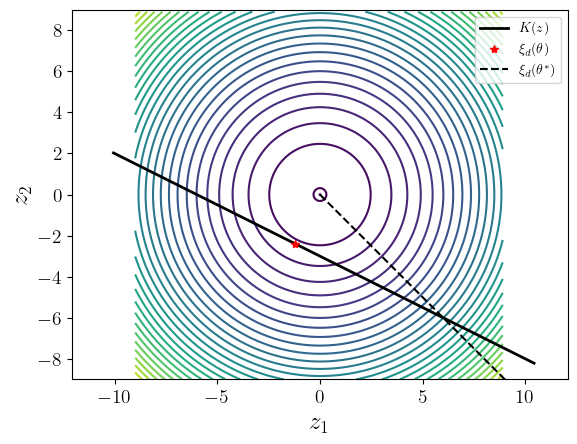

In [2]:

# Plotting contour plot of J1 and the solutions set xi_d
fig1, ax1 = plt.subplots()
ax1.contour(Xi1, Xi2, J1, levels=[0, 0.001, *np.arange(0.05, 90, 3)])
ax1.set_xlabel('$z_1$')
ax1.set_ylabel('$z_2$')
ax1.plot(xid[0, :], xid[1, :], 'k', linewidth=2)
ax1.plot(xi1[0], xi1[1], 'r*', linewidth=2)
ax1.plot([0, xi_range * a0[0] * 2], [0, xi_range * a0[1] * 2], 'k--', linewidth=1.5)
ax1.axis('equal')
ax1.axis([-xi_range, xi_range, -xi_range, xi_range])
ax1.legend([r"$K(z)$", r"$\xi_d(\theta)$", r"$\xi_d(\theta^*)$", r"$a_{ref}$"])
ax1.tick_params(axis='both', which='major', labelsize=14)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


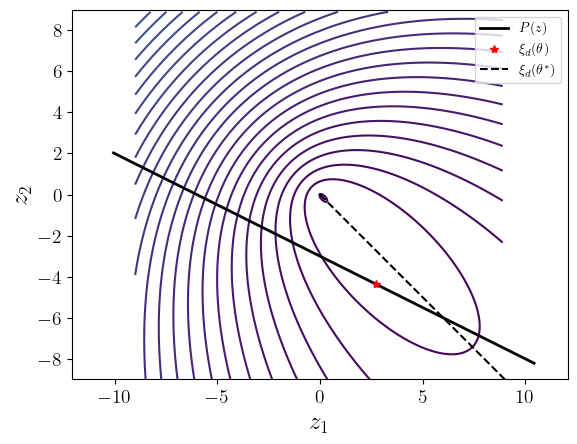

In [3]:

# Plotting contour plot of J2 and the solutions set xi_d
fig2, ax2 = plt.subplots()
ax2.contour(Xi1, Xi2, J2, levels=[0, 0.001, *np.arange(0.05, 90, 1)])
ax2.set_xlabel('$z_1$')
ax2.set_ylabel('$z_2$')
ax2.plot(xid[0, :], xid[1, :], 'k', linewidth=2)
ax2.plot(xi2[0], xi2[1], 'r*', linewidth=2)
ax2.plot([0, xi_range * a0[0] * 2], [0, xi_range * a0[1] * 2], 'k--', linewidth=1.5)
ax2.axis('equal')
ax2.axis([-xi_range, xi_range, -xi_range, xi_range])
ax2.legend([r"$P(z)$", r"$\xi_d(\theta)$", r"$\xi_d(\theta^*)$", r"$a_{ref}$"])
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.show()

